### MODUL VI: PENDETEKSIAN TEPI

#### No.1
Lakukanlah deteksi tepi dengan menggunakan metode Sobel, Prewitt dan Roberts

#### Import Library
Baris code di bawah ini digunakan untuk menginpor fungsi-fungsi yang akan digunakan dengan perincian
- matplotlib.pyplot digunakan untuk membuat grafik sederhana 2d.
- numpy digunakan untuk membantu dalam membaca gambar ke dalam bentuk array.
- cv2 atau OpenCV berfungsi untuk melakukan konversi color space.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### Deklarasi dan Inisialisasi Citra
Fungsi imread digunakan untuk membaca suatu data citra dari file yang mana dalam baris perintah di bawah ini citra yang akan diolah telah disimpan ke variabel img.

In [4]:
img = plt.imread("Modul6.jpg")

#### Mengubah Citra ke dalam Grayscale
Perintah di bawah ini digunakan untuk mengubah citra berwarna ke dalam grayscale.Fungsi cvtColor digunakan untuk mengubah gambar ke dalam warna yang diinginkan. 
- Pertama, fungsi akan menerima citra asli yang ditunjukkan oleh image
- Kedua, fungsi akan mengonversikan citra ke dalam bentuk yang diingikan dalam hal ini digunakan cv.COLOR_BGR2GRAY
- Ketiga, hasil color space conversion disimpan ke dalam variable yang telah dibuat

In [7]:
grayimg = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#### Menampilkan Hasil Citra Asli dengan Citra Grayscale
Baris perintah di bawah ini digunakan untuk menampilkan hasil pengolahan citra. Hasil keluaran dari fungsi ini ialah perbandingan antara citra sebelum dan sesudah diolah menjadi grayscale. Untuk menampilkan dua citra sekaligus digunakan fungsi subplots dengan f,ax merujuk pada jumlah baris dan kolom yang diiginkan. 
Dalam baris perintah ini digunakan library matplotlib, maka harus digunakan colormap (cmap).Apabila tidak menggunakan cmap, maka secara default akan dihasilkan citra dengan warna yang berbeda dari yang telah diolah sebelumnya.
Berikutnya digunakan fungsi set_title untuk memberikan judul dari tiap citra pada tiap indeksnya

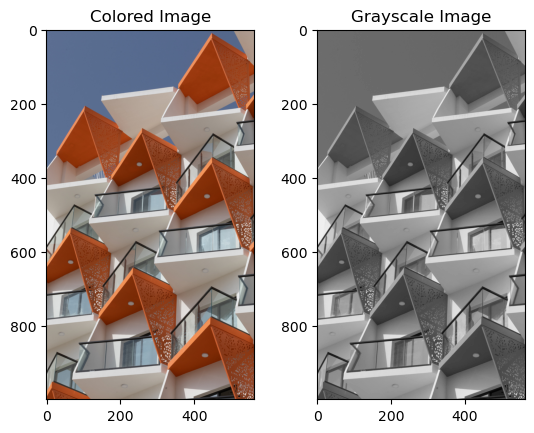

In [237]:
f, ax = plt.subplots(1,2)
ax[0].imshow(img) 
ax[0].set_title("Colored Image")
    
ax[1].imshow(grayimg, cmap = 'gray') 
ax[1].set_title("Grayscale Image")
plt.show()

#### Menampilkan Hasil Filtering
Fungsi display digunakan untuk menampilkan hasil pengolahan ke dalam bentuk subplot. Pada fungsi ini digunakan sebanyak 3 parameter untuk citra yang akan ditampilkan, yaitu citra untuk hasil filtering modus, mean, dan median serta sisa satu parameter lainnya, yaitu text yang akan ditampilkan dari title pada tiap citra. Pada fungsi di bawah ini digunakan fungsi plt.subplot yang digunakan dan berisi dari gambar dan sumbu yang akan digunakan.

In [17]:
def display(img1,img2,img3,text1,text2,text3):
    f, ax = plt.subplots(1,3)
    ax[0].imshow(img1, cmap = 'gray') 
    ax[0].set_title(text1)
    
    ax[1].imshow(img2, cmap = 'gray') 
    ax[1].set_title(text2)

    ax[2].imshow(img3, cmap = 'gray') 
    ax[2].set_title(text3)
    
    plt.tight_layout()
    plt.show()

#### Proses Filtering
Fungsi filtering digunakan untuk melakukan salah satu proses filtering antara mean,median, dan modus. Pada fungsi ini digunakan 4 buah parameterm yaitu img yang merupakan citra yang akan diolah, w_kernel dan h_kernel merupakan panjang dan lebar dari besaran filtering yang diinginkan, serta op yang bernilai string dan digunakan untuk menunjukkan operasi filtering mana yang akan dilakukan. Pada fungsi ini akan dilakukan padding agar semua pixel dalam matrix ikut terkena filter. Berikutnya, akan dilakukan pengkondisian untuk menentukan operasi filtering mana yang akan dilakukan.

In [18]:
#convolution
def conv(img,kernel):
    h_img, w_img = img.shape
    h_ker,w_ker  = kernel.shape
    
    #mencari nilai tengah dari kernel
    #operand // digunakan agar hasil pembagian bernilai integer
    h_center = ((h_ker-1)//2)
    w_center = ((w_ker - 1)//2)
    
    #digunakan untuk menyimpan hasil konvolusi
    #karena menggunakan paddiny, maka besarannya akan sama dengan besaran citra asli
    h_res = h_img
    w_res = w_img
    
    #mendapatkan ukuran padding 
    l_pad = w_center
    #left padding
    r_pad = w_ker - w_center
    #right padding
    t_pad = h_center
    #top padding
    b_pad = h_ker - h_center
    #bottom padding
    
    arr = np.pad(img,((l_pad,r_pad),(t_pad,b_pad)), mode = 'edge')
    #np.pad digunakan untuk melakukan padding pada sisian array yang mana dalam hal ini
    #parameter pertama menunjukkan array yang akan dilakukan padding
    #parameter kedua, yaitu padd width menunjukkan pada bagian mana saja akan dilakukan 
    #parameter ketiga, yaitu mode padding yang digunakan yang mana pada baris perintah ini digunakan mode edge
    #mode edge berarti akan dilakukan padding menggunakan nilai tepi pada array
    
    result = np.zeros((h_res,w_res))
     #membuat array dengan besaran sesuai citra yang akan dikonvolusikan yang akan diolah dan berisi 0
    
    #perulangan di bawah  ini dilakukan untuk melakukan proses konvolusi 
    for i in range(h_res):
        for j in range (w_res):
            #variabel temp digunakan untuk menampung hasil sum of product 
            temp = 0
            for k in range (h_ker):
                for l in range (w_ker):
                    temp+= arr[i+k,j+l]* kernel[k,l]
            result[i,j] = temp
    return  result

#### Operator Roberts

Fungsi roberts digunakan untuk melakukan filtering dengan menggunakan operator roberts dengan menerima sebuah argumen berupa gambar yang akan diolah dan ditampung di dalam variabel img. Berikutnya, proses dilanjutkan dengan menginisialisasi dan mendeklarasikan variabel gx dan gy untuk menampung kernel yang akan digunakan dalam proses pendeteksian tepi. Berikutnya, akan dilakukan proses konvolusi dengan memanggil fungsi conv. Hasil pengonvolusian itu berikutnya disimpan masing-masing ke dalam variabel gx dan gy. Untuk variabel x merupakan hasil konvolusi dengan kernel gx sedangkan untuk variabel y merupakan hasil konvolusi dengan kernel gy. Berikutnya untuk mendapatkan hasil gradient dari citra yang akan diolah berikutnya dihitung dengan menggunakan rumus G = abs(Gx) dan abs(Gy). Hasil deteksi tepi pada sb.x dan sb.y dan gradient berikutnya ditampilkan dengan emmanggil fungsi display.

Hasil dari pengolahan gradient ini berikutnya dikembalikan dengan perintah return.

In [ ]:
def roberts(img):
    gx = np.array([[0,1],[0,-1]])
    gy = np.array([[0,0],[1,-1]])
    
    x = conv(img, gx)
    x = np.sqrt(x*x)
    y = conv(img, gy)
    y = np.sqrt(y*y)
    
    gradient = abs(x)+abs(y)
    
    display(x,y,gradient,"x","y","Roberts")
    
    return gradient

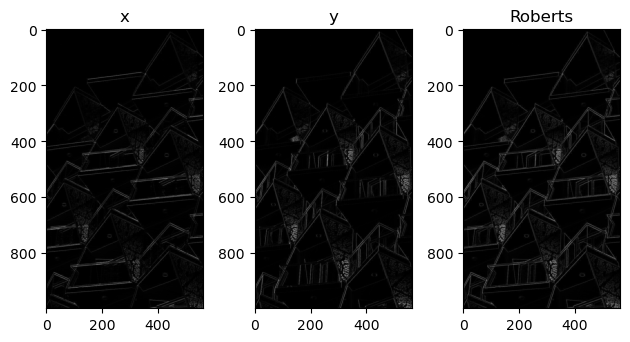

In [23]:
r_res = roberts(grayimg)

#### Operator Sobel

Fungsi sobel digunakan untuk melakukan filtering dengan menggunakan operator sobel dengan menerima sebuah argumen berupa gambar yang akan diolah dan ditampung di dalam variabel img. Berikutnya, proses dilanjutkan dengan menginisialisasi dan mendeklarasikan variabel gx dan gy untuk menampung kernel yang akan digunakan dalam proses pendeteksian tepi. Berikutnya, akan dilakukan proses konvolusi dengan memanggil fungsi conv. Hasil pengonvolusian itu berikutnya disimpan masing-masing ke dalam variabel gx dan gy. Untuk variabel x merupakan hasil konvolusi dengan kernel gx sedangkan untuk variabel y merupakan hasil konvolusi dengan kernel gy. Berikutnya untuk mendapatkan hasil gradient dari citra yang akan diolah berikutnya dihitung dengan menggunakan rumus G = abs(Gx) dan abs(Gy). Hasil deteksi tepi pada sb.x dan sb.y dan gradient berikutnya ditampilkan dengan emmanggil fungsi display.

Hasil dari pengolahan gradient ini berikutnya dikembalikan dengan perintah return.

In [24]:
def sobel(img):
    gx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    gy = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    
    x = conv(img, gx)
    x = np.sqrt(x*x)
    y = conv(img, gy)
    y = np.sqrt(y*y)
    
    gradient = abs(x)+abs(y)
    
    display(x,y,gradient,"x","y","Sobel")
    
    return gradient

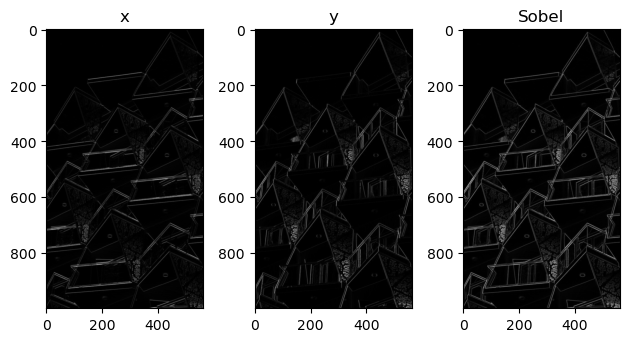

In [25]:
s_res = sobel(grayimg)

#### Operator Prewitt

Fungsi prewitt digunakan untuk melakukan filtering dengan menggunakan operator prewitt dengan menerima sebuah argumen berupa gambar yang akan diolah dan ditampung di dalam variabel img. Berikutnya, proses dilanjutkan dengan menginisialisasi dan mendeklarasikan variabel gx dan gy untuk menampung kernel yang akan digunakan dalam proses pendeteksian tepi. Berikutnya, akan dilakukan proses konvolusi dengan memanggil fungsi conv. Hasil pengonvolusian itu berikutnya disimpan masing-masing ke dalam variabel gx dan gy. Untuk variabel x merupakan hasil konvolusi dengan kernel gx sedangkan untuk variabel y merupakan hasil konvolusi dengan kernel gy. Berikutnya untuk mendapatkan hasil gradient dari citra yang akan diolah berikutnya dihitung dengan menggunakan rumus G = abs(Gx) dan abs(Gy). Hasil deteksi tepi pada sb.x dan sb.y dan gradient berikutnya ditampilkan dengan emmanggil fungsi display.

Hasil dari pengolahan gradient ini berikutnya dikembalikan dengan perintah return.

In [28]:
def prewitt(img):
    gx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    gy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    
    x = conv(img, gx)
    x = np.sqrt(x*x)
    y = conv(img, gy)
    y = np.sqrt(y*y)
    
    gradient = abs(x)+abs(y)
    
    display(x,y,gradient,"x","y","Prewitt")
    
    return gradient

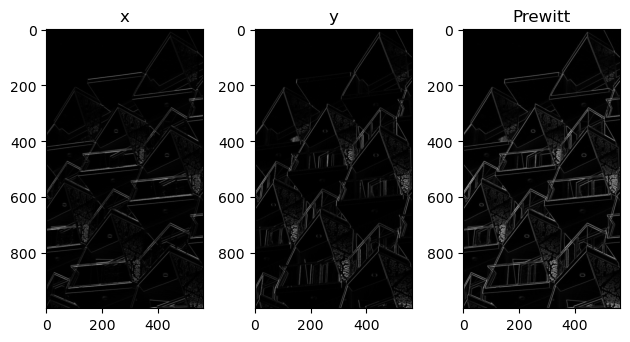

In [29]:
p_res = prewitt(grayimg)

Baris perintah di bawah ini digunakan untuk menampikan keseluruhan hasil filtering citra secara keseluruhan. Pada baris perintah ini digunakan fungsi plt.subplots(3,3) yang menunjukkan bahwa akan dibuat 3 baris dan 3 kolom. Berikutnya akan ditampilkan citra seperti pada contoh code
- ax[0,0].imshow menunjukkan bahwa akan ditampikan citra pada baris dengan indeks ke-0 dan kolom dengan indeks ke-0 dengan bentuk grayscale yang ditunjukkan dengan baris peritnah cmap = gray.
- ax[0,0].set_title digunakan untuk menampilkan judul dari tiap citra pada tiap indeksnya yang mana pada baris perintah ini berarti akan ditampilkan judul pada citra di baris dengan indeks ke-0 dan kolom dengan indeks ke-0.
Berikutnya, untuk mengatur jarak antar gambar agar tidak berdekatan digunakan fungsi tight.layout(

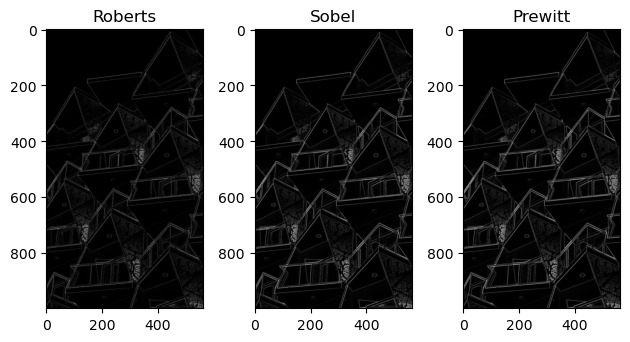

In [31]:
f, ax = plt.subplots(1,3)
ax[0].imshow(r_res, cmap = 'gray') 
ax[0].set_title("Roberts")
    
ax[1].imshow(s_res, cmap = 'gray') 
ax[1].set_title("Sobel")
    
ax[2].imshow(p_res, cmap = 'gray') 
ax[2].set_title("Prewitt")
    
plt.tight_layout()
plt.show()

#### No.2
Buatlah method untuk mencari hasil terbaik dari ketiga metode no 1 dengan cara melihat jumlah warna yang diperoleh dari hasil deteksi tepi(Dapat menggunakan if-else statement)

#### Fungsi Normalization
Fungsi Normalization digunakan untuk mengubah rentan nilai dalam pixel pada rentang 0-255. Fungsi ini mengambil argumen berupa array yang akan diolah.
- minval digunakan untuk mengambil nilai piksel minimum pada array yang diolah.
- mixval digunakan untuk mengambil nilai piksel maksimum pada array yang akan diolah.

Berikutnya akan dikembalikan nilai hasil perhitungan berupa pengurangan tiap nilai piksel dengan nilai minval dan dikalikan dengan 255 yang berikutnya dibagi dengan hasil pengurangan minval dan maxval. Digunakan operator "//" agar hasil yang dihasilkan berupa bilangan integer.

In [34]:
def normalization(arr):
    minval = np.min(arr)
    maxval = np.max(arr)
    
    return np.array(((arr-minval)*255)//(maxval-minval),dtype=int)

#### Fungsi Get The Best
Fungsi get_the_best digunakan untuk menghitung pixel dengan nilai 0. Pada fungsi ini diambil parameter citra yang akan dihitung. Cara perhitungannya, ialah melakukan perulangan sebanyakan besaran citra yang akan diolah. Setiap, ditemukan nilai pixel 0 maka variabel white akan bertambah sebanyak 1. Setelah selesai dilakukan perulangan akan dikembalikan hasil akhir dari variabel white.

In [39]:
def get_the_best(arr):
    white_pix = 0
    
    for i in range (arr.shape[0]):
        for j in range(arr.shape[1]):
            if(arr[i][j]) == 0:
                white_pix += 1
    
    return white_pix

In [40]:
#melakukan proses normalisasi pada setiap hasil pendektesian tepi pada masing-masing filter
r_res = normalization(r_res)
p_res = normalization(p_res)
s_res = normalization(s_res)

In [41]:
#melakukan proses perhitungan pixel bernilai 0
count_r = get_the_best(r_res)
count_p = get_the_best(p_res)
count_s = get_the_best(s_res)

In [42]:
#menampilkan hasil perhitungan nilai pixel pada masing-masing pendektesian tepi
print("Roberts: ", count_r)
print("Prewitt: ", count_s)
print("Sobel: ", count_s)

Roberts:  181072
Prewitt:  201545
Sobel:  201545
